In [1]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
sys.path.append("../src")



In [57]:
xi = 5.0
prefix = f"/nfs/dust/luxe/user/spatarod/ConnectionListStudy/e0gpc/{xi}/smeared"

BX = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

sub_qubo_size = 5

In [58]:
num_BX_impact_list_completed = 0
num_BX_connection_list_completed = 0

for folder in os.listdir(prefix):
    if "example" in folder:
        for subfolder in os.listdir(f"{prefix}/{folder}"):
            if f"eigensolver_{sub_qubo_size}q_impact_list_reverse" in subfolder:
                is_complete = False
                for file in os.listdir(f"{prefix}/{folder}/{subfolder}"):
                    if "reco_xplet_list_ambiguity_solved" in file:
                        is_complete = True
                        num_BX_impact_list_completed +=1
                        
            if f"eigensolver_{sub_qubo_size}q_connection_list" in subfolder:
                is_complete = False
                for file in os.listdir(f"{prefix}/{folder}/{subfolder}"):
                    if "reco_xplet_list_ambiguity_solved" in file:
                        is_complete = True
                        num_BX_connection_list_completed +=1                        
print(num_BX_impact_list_completed)
print(num_BX_connection_list_completed)
                
                                     


10
10


In [84]:
def get_eff_and_frate(reco_xplets, gen_xplets):

    matched_tracks = 0
    fake_tracks = 0

    matched_tracks_bookkeeping = set()
    
    fake_chi_squared = []
    matched_chi_squared = []
    gen_chi_squared = []
    
    for g in gen_xplets:
        gen_chi_squared.append(g.chi_squared)
        print(g.fit_lin_track())
    for track in reco_xplets:
        matched = False
        p_id = None
        ids = set(track.particle_ids.values())
        for test_id in ids:
            count = 0
            for particle_id in track.particle_ids.values():
                if test_id == particle_id:
                    count += 1
            if count >= 3:
                p_id = test_id
                matched = True
        if matched:
            if p_id not in matched_tracks_bookkeeping:
                matched_tracks += 1
                matched_tracks_bookkeeping.add(p_id)
                matched_chi_squared.append(track.chi_squared)
            else:
                pass
        else:
            fake_tracks += 1
            fake_chi_squared.append(track.chi_squared)
   
    return matched_tracks / len(gen_xplets), fake_tracks / len(reco_xplets), [matched_chi_squared,
                                                                              fake_chi_squared,
                                                                              gen_chi_squared]

In [85]:
xi_7_eff_connection_list = []
xi_7_connection_list_chi_squared_matched = []
xi_7_connection_list_chi_squared_fake = []
xi_7_connection_list_chi_squared_gen = []

xi_7_eff_impact_list = []
xi_7_impact_list_chi_squared_matched = []
xi_7_impact_list_chi_squared_fake = []
xi_7_impact_list_chi_squared_gen = []


xi_7_frate_connection_list = []
xi_7_frate_impact_list = []

for folder in os.listdir(prefix):
    if "example" in folder:
        for subfolder in os.listdir(f"{prefix}/{folder}"):
            if f"eigensolver_{sub_qubo_size}q_impact_list_reverse" in subfolder:
                reco_xplets = np.load(f"{prefix}/{folder}/{subfolder}/reco_xplet_list_ambiguity_solved.npy",
                                    allow_pickle=True)
                gen_xplets = np.load(f"{prefix}/" + "_".join(["_".join(folder.split("_")[0:3]),"sl", "gen_xplet_list.npy"]),
                                     allow_pickle=True)
                statistics = get_eff_and_frate(reco_xplets, gen_xplets)
                xi_7_eff_impact_list.append(statistics[0])
                xi_7_frate_impact_list.append(statistics[1])
                
                xi_7_eff_impact_list_chi_squared_matched.append(statistics[2][0])
                xi_7_eff_impact_list_chi_squared_fake.append(statistics[2][1])
                xi_7_eff_impact_list_chi_squared_gen.append(statistics[2][2])

           
            if f"eigensolver_{sub_qubo_size}q_connection_list" in subfolder:
                reco_xplets = np.load(f"{prefix}/{folder}/{subfolder}/reco_xplet_list_ambiguity_solved.npy",
                                    allow_pickle=True)
                gen_xplets = np.load(f"{prefix}/" + "_".join(["_".join(folder.split("_")[0:3]),"sl", "gen_xplet_list.npy"]),
                                     allow_pickle=True)
                statistics = get_eff_and_frate(reco_xplets, gen_xplets)
                xi_7_eff_connection_list.append(statistics[0])
                xi_7_frate_connection_list.append(statistics[1])
                
                xi_7_connection_list_chi_squared_matched.append(statistics[2][0])
                xi_7_connection_list_chi_squared_fake.append(statistics[2][1])
                xi_7_connection_list_chi_squared_gen.append(statistics[2][2])

                

AttributeError: 'Xplet' object has no attribute 'fit_lin_track'

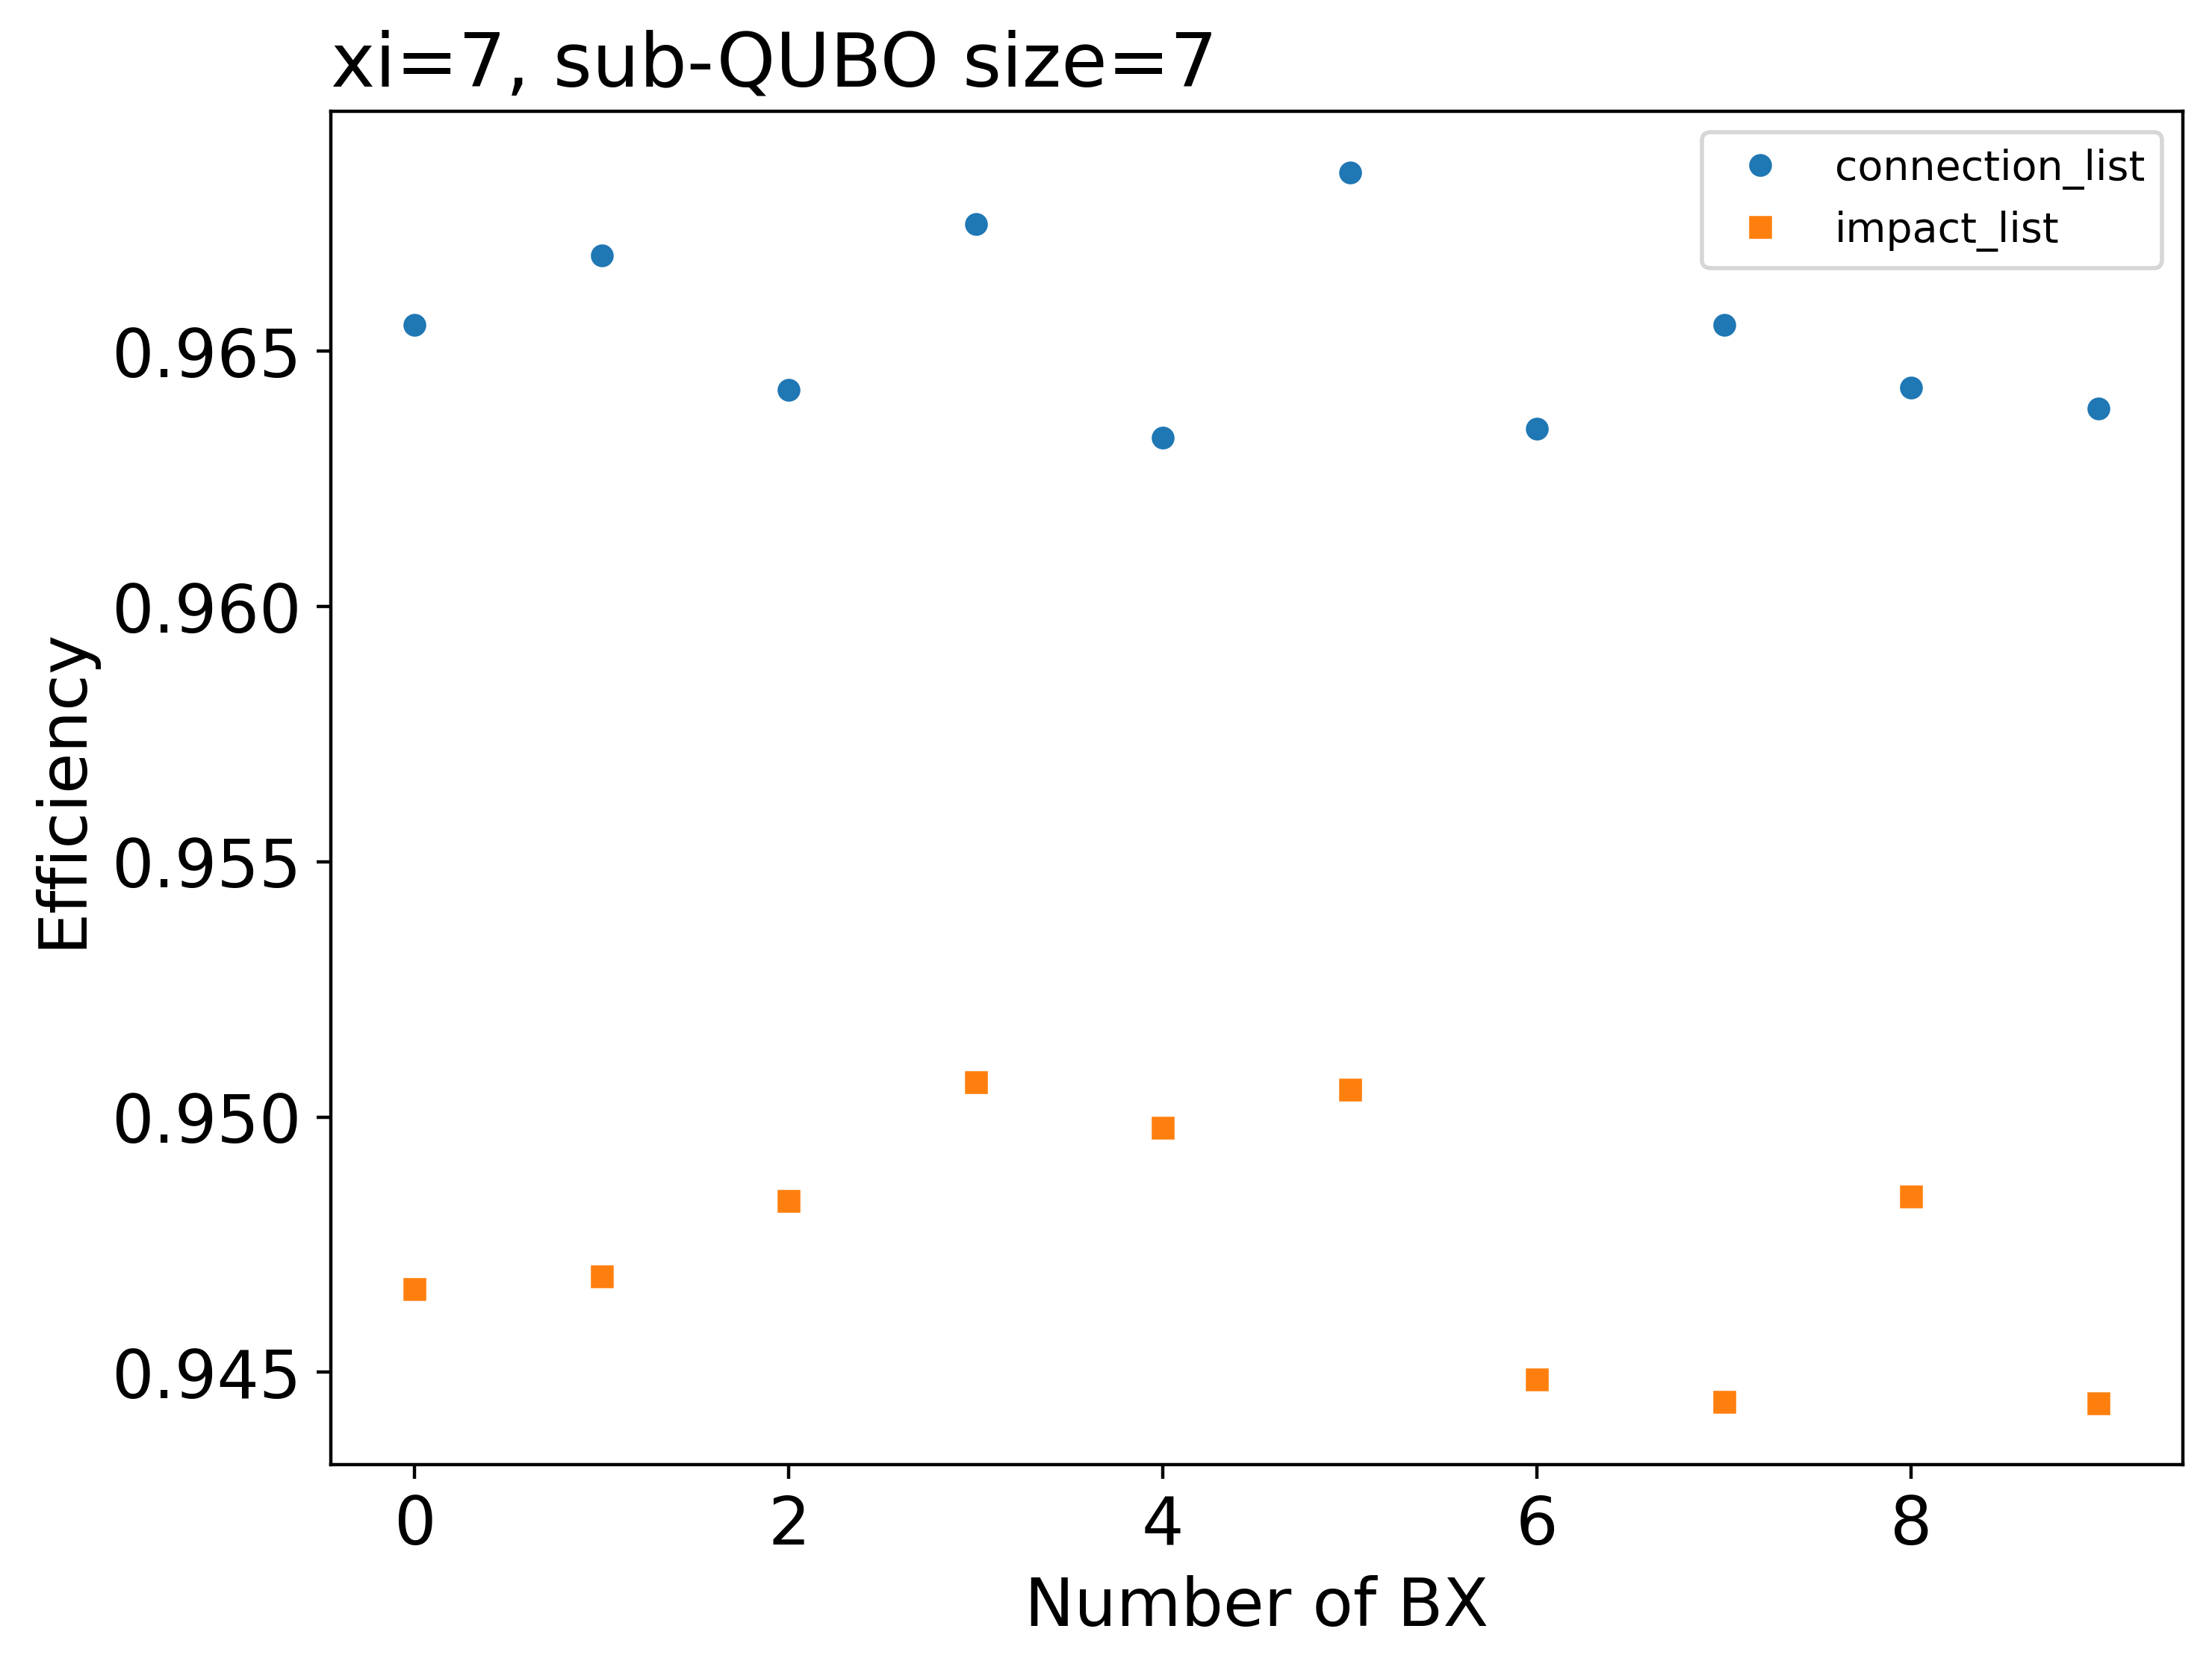

In [61]:
plt.figure(figsize=(8, 6), dpi=400)
plt.plot(xi_7_eff_connection_list, label="connection_list", linestyle=" ", marker="o", markersize=4.5)
plt.plot(xi_7_eff_impact_list , label="impact_list", linestyle=" ", marker="s", markersize=4.5)
plt.xlabel("Number of BX", fontsize=16)
plt.ylabel("Efficiency", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="best")
plt.title("xi=7, sub-QUBO size=7", fontsize=18, loc="left")
plt.savefig("Connection_list_efficiency.pdf")

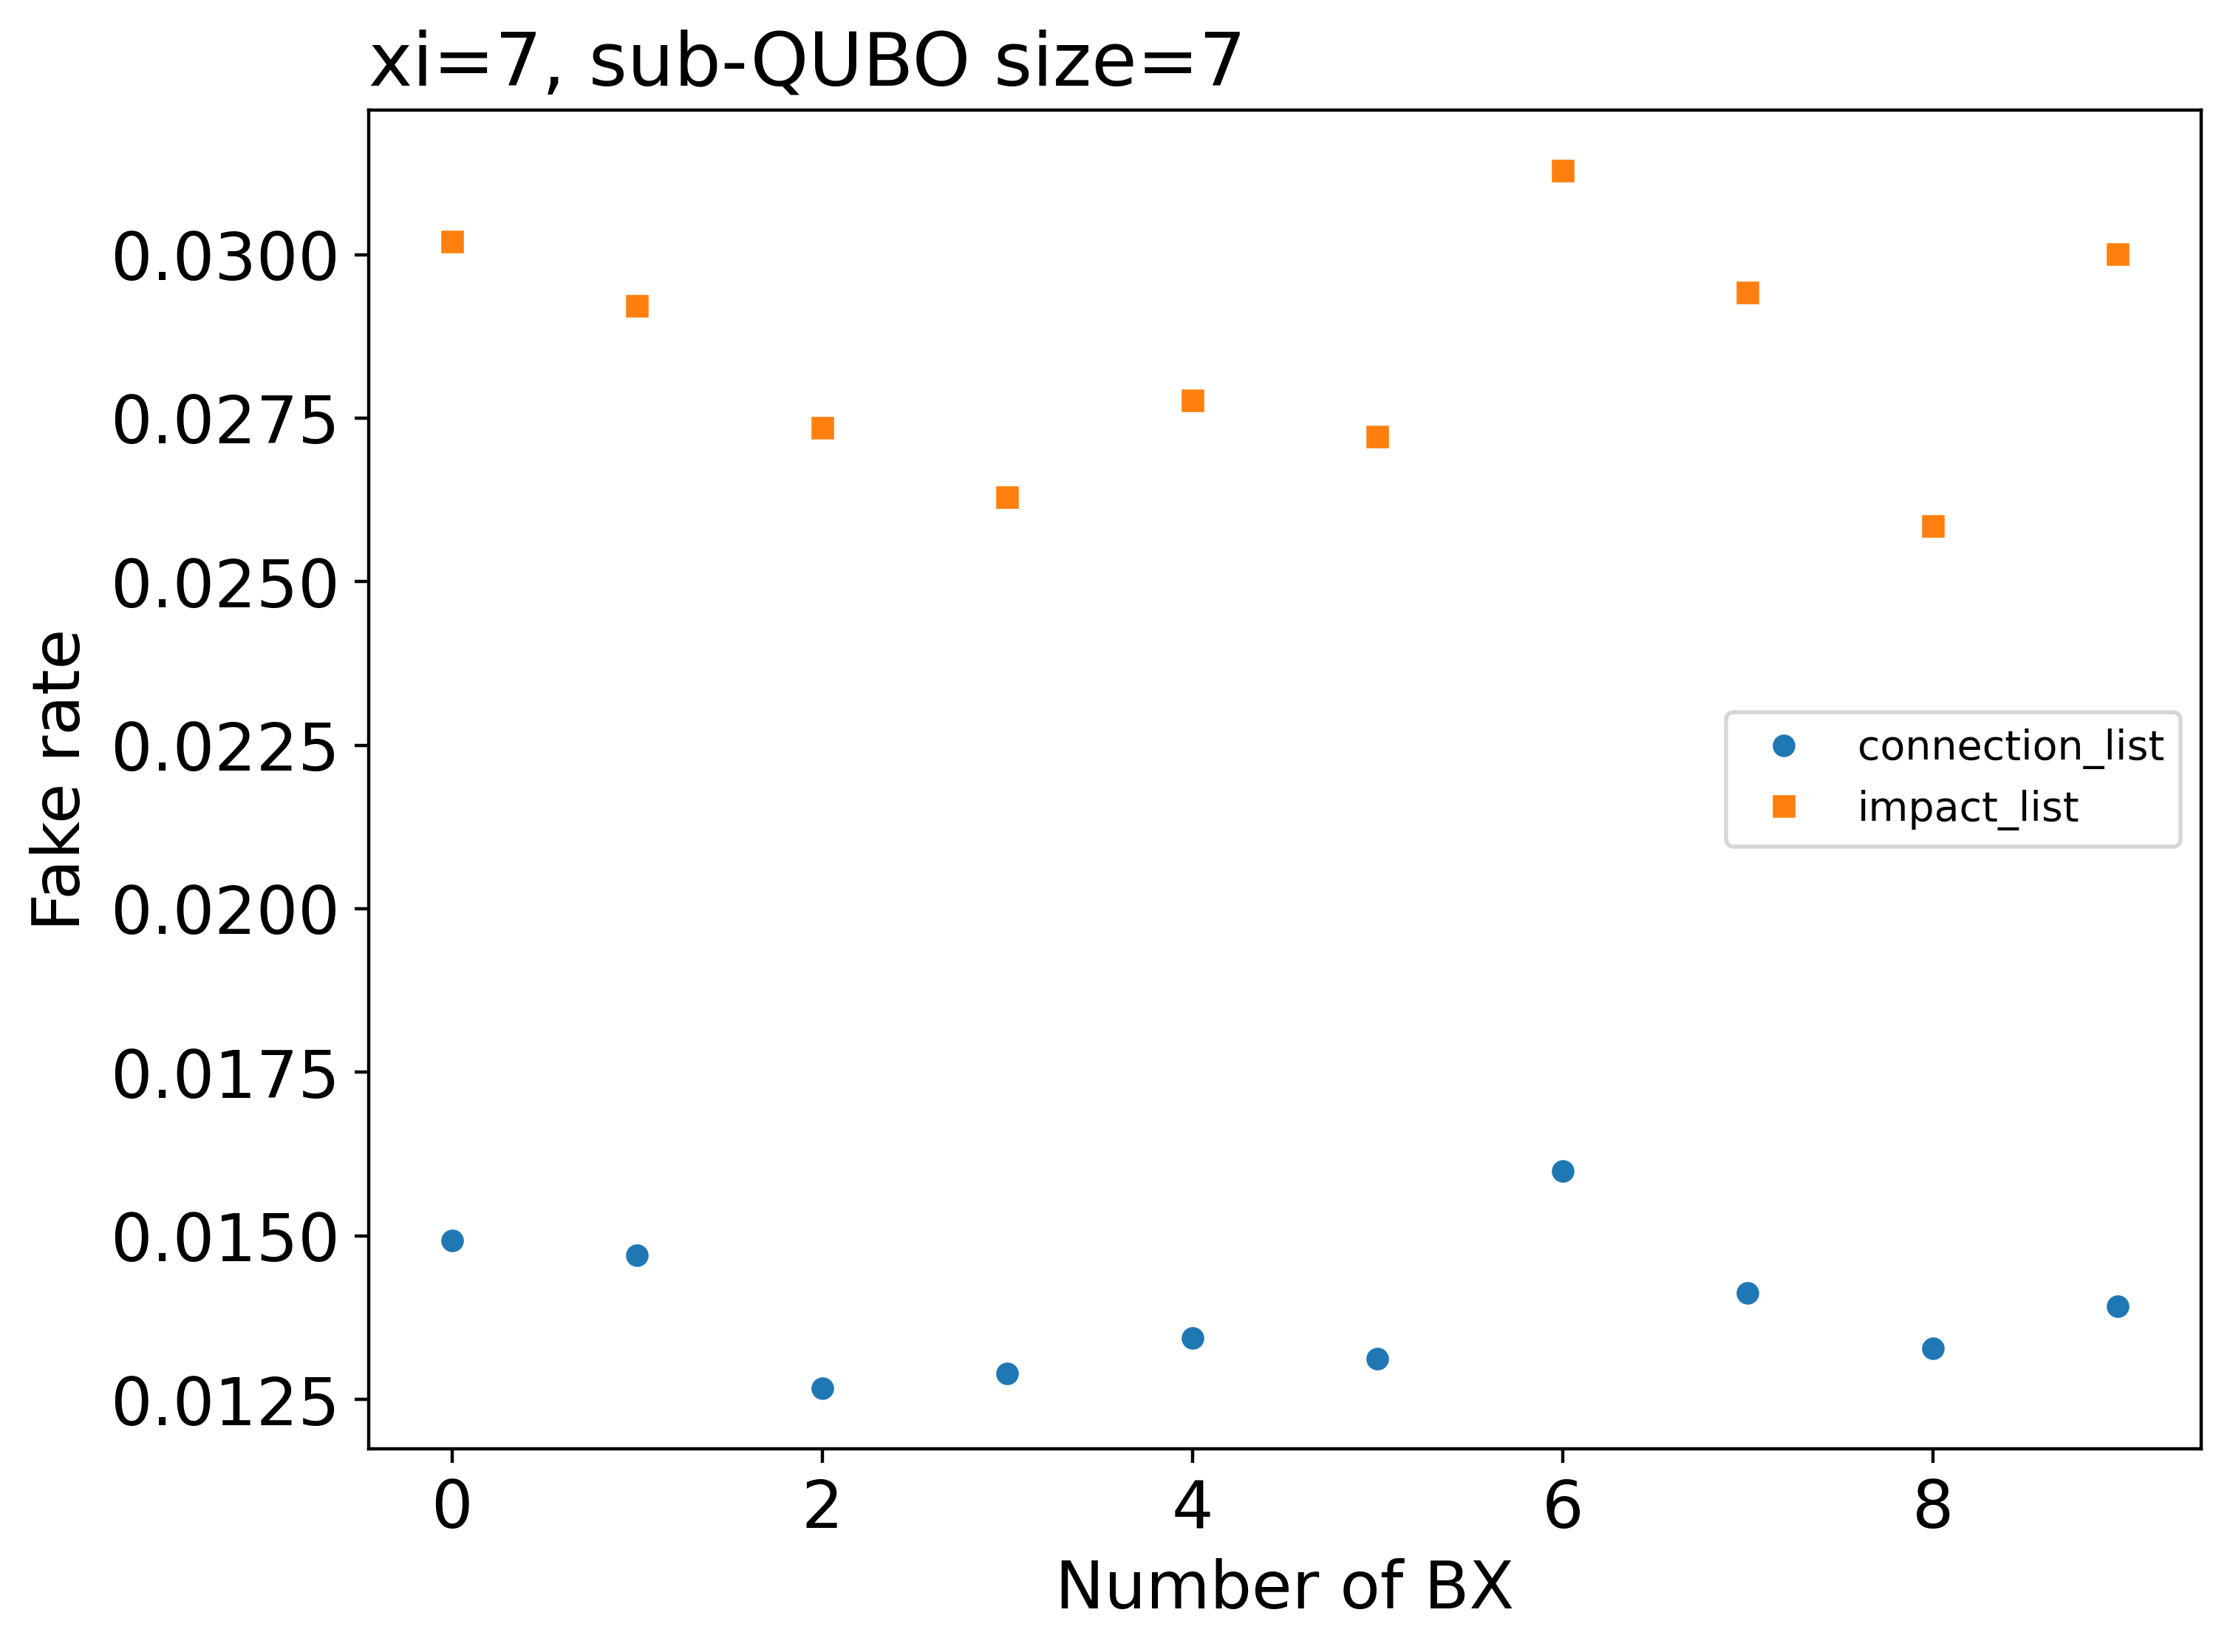

In [62]:
plt.figure(figsize=(8, 6), dpi=400)
plt.plot(xi_7_frate_connection_list, label="connection_list", linestyle=" ", marker="o", markersize=4.5)
plt.plot(xi_7_frate_impact_list , label="impact_list", linestyle=" ", marker="s", markersize=4.5)
plt.xlabel("Number of BX", fontsize=16)
plt.ylabel("Fake rate", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="best")
plt.title("xi=7, sub-QUBO size=7", fontsize=18, loc="left")
plt.savefig("Connection_list_fake_rate.pdf")

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

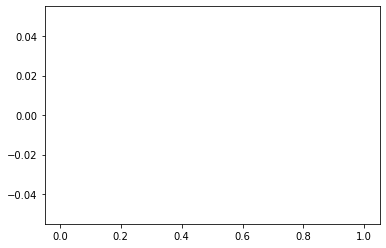

In [79]:
plt.hist(xi_7_impact_list_chi_squared_matched)

In [73]:
print(xi_7_impact_list_chi_squared_matched)

[]
